In [1]:
import pickle
import os.path
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt

import geo

%matplotlib inline

## Load data

In [2]:
communes_info = pd.read_csv('../communes_info_without_geo.csv')

In [3]:
building_probas = pd.read_csv('../building_probas.csv')

## By INSEE

In [4]:
probas_by_insee = defaultdict(lambda : {'class_0': 0., 'class_1': 0., 'class_2': 0., 'class_3': 0., })

In [5]:
# TODO : use groupby instead
for ident, info in building_probas.iterrows():
    insee = info['insee']
    probas_by_insee[insee]['class_0'] += info['class_0']
    probas_by_insee[insee]['class_1'] += info['class_1']
    probas_by_insee[insee]['class_2'] += info['class_2']
    probas_by_insee[insee]['class_3'] += info['class_3']

In [6]:
len(probas_by_insee)

28637

In [7]:
probas_by_insee

defaultdict(<function __main__.<lambda>>,
            {'74216': {'class_0': 6.095651552969083,
              'class_1': 9.68205346324406,
              'class_2': 3.165176272993215,
              'class_3': 4.057118710793641},
             '91222': {'class_0': 12.42850922283963,
              'class_1': 9.890455127190178,
              'class_2': 1.549789806362595,
              'class_3': 6.131245843607597},
             '25099': {'class_0': 0.18131348857986607,
              'class_1': 0.044856560869273185,
              'class_2': 0.2918812761246006,
              'class_3': 0.4819486744262602},
             '68229': {'class_0': 7.272954183534328,
              'class_1': 7.996057222819938,
              'class_2': 0.3799588386710752,
              'class_3': 4.3510297549746575},
             '39317': {'class_0': 6.019134633369411,
              'class_1': 2.2055437360112613,
              'class_2': 0.20527851240335637,
              'class_3': 2.5700431182159704},
             '80

## Filter

In [8]:
communes_info = communes_info[
    (communes_info.centroid_x > -20) & 
    (communes_info.centroid_x < 20) & 
    (communes_info.centroid_y > 30) & 
    (communes_info.centroid_y < 60)]

In [9]:
insee_known = set(probas_by_insee.keys())
insee_map = set(communes_info.insee)
insee_set = insee_known & insee_map

In [10]:
def filter_insee(insee):
    if insee not in insee_set:
        return False
    return ((probas_by_insee[insee]['class_0'] > 1.) and
        (probas_by_insee[insee]['class_1'] > 1.) and
        (probas_by_insee[insee]['class_0'] + probas_by_insee[insee]['class_1'] > 00.) and
        (probas_by_insee[insee]['class_2'] > 1.) and
        (probas_by_insee[insee]['class_3'] > 1.))

to_be_ploted = communes_info.insee.apply(filter_insee)

In [11]:
communes_info_filtered = (communes_info[to_be_ploted]).copy()

In [12]:
communes_info_filtered['class_0'] = communes_info_filtered.insee.apply(lambda insee: probas_by_insee[insee]['class_0'])
communes_info_filtered['class_1'] = communes_info_filtered.insee.apply(lambda insee: probas_by_insee[insee]['class_1'])
communes_info_filtered['class_2'] = communes_info_filtered.insee.apply(lambda insee: probas_by_insee[insee]['class_2'])
communes_info_filtered['class_3'] = communes_info_filtered.insee.apply(lambda insee: probas_by_insee[insee]['class_3'])

## Plot

In [13]:
communes_info_filtered['orientation_moyenne'] = (
    communes_info_filtered.class_0 / 
    (communes_info_filtered.class_0 + communes_info_filtered.class_1)
    )

In [14]:
communes_info_filtered

,Unnamed: 0,centroid_x,centroid_x_L93,centroid_y,centroid_y_L93,insee,nom,surf_m2,class_0,class_1,class_2,class_3,orientation_moyenne
1,1,6.918592,1.016714e+06,43.538250,6.278894e+06,06079,Mandelieu-la-Napoule,32119612.0,54.981748,25.478715,30.559291,97.980246,0.683339
2,2,2.229485,6.385350e+05,44.307838,6.356841e+06,12198,Rieupeyroux,54866747.0,54.393779,37.626192,11.808076,30.171953,0.591108
11,11,-1.507984,3.744850e+05,49.650537,6.959435e+06,50077,Bretteville,5831750.0,12.608276,7.969459,6.014620,5.407644,0.612714
15,15,3.537497,7.383204e+05,50.325932,7.025446e+06,59032,Aulnoy-lez-Valenciennes,6086611.0,4.818982,4.849741,7.073017,11.258260,0.498409
16,16,-1.400376,3.825002e+05,49.691336,6.963529e+06,50142,Cosqueville,11022241.0,25.069435,16.812903,4.503208,12.614454,0.598568
17,17,2.197597,6.410487e+05,48.783935,6.854044e+06,78640,Vélizy-Villacoublay,8954732.0,19.558950,29.547267,39.364539,69.529244,0.398299
18,18,3.868989,7.701702e+05,43.613365,6.279761e+06,34172,Montpellier,57080901.0,287.923843,203.312397,237.992616,251.771144,0.586121
24,24,-1.398389,3.825104e+05,49.669877,6.961137e+06,50539,Saint-Pierre-Église,8106639.0,23.376198,23.134816,6.710234,21.778753,0.502595
25,25,2.834889,6.864434e+05,42.651736,6.172472e+06,66038,Canohès,8700392.0,21.803751,19.690695,3.610832,7.894722,0.525462
27,27,-1.631226,3.654991e+05,49.635687,6.958300e+06,50129,Cherbourg-Octeville,18506437.0,389.976482,332.355895,102.033469,399.634154,0.539885


### geopandas.plot

In [ ]:
choropleth_map_small = choropleth_map_2[:5000]

In [ ]:
choropleth_map_2.plot('orientation_moyenne', linewidth=0., figsize=(15,10))#, cmap='OrRd')

### scatter plot

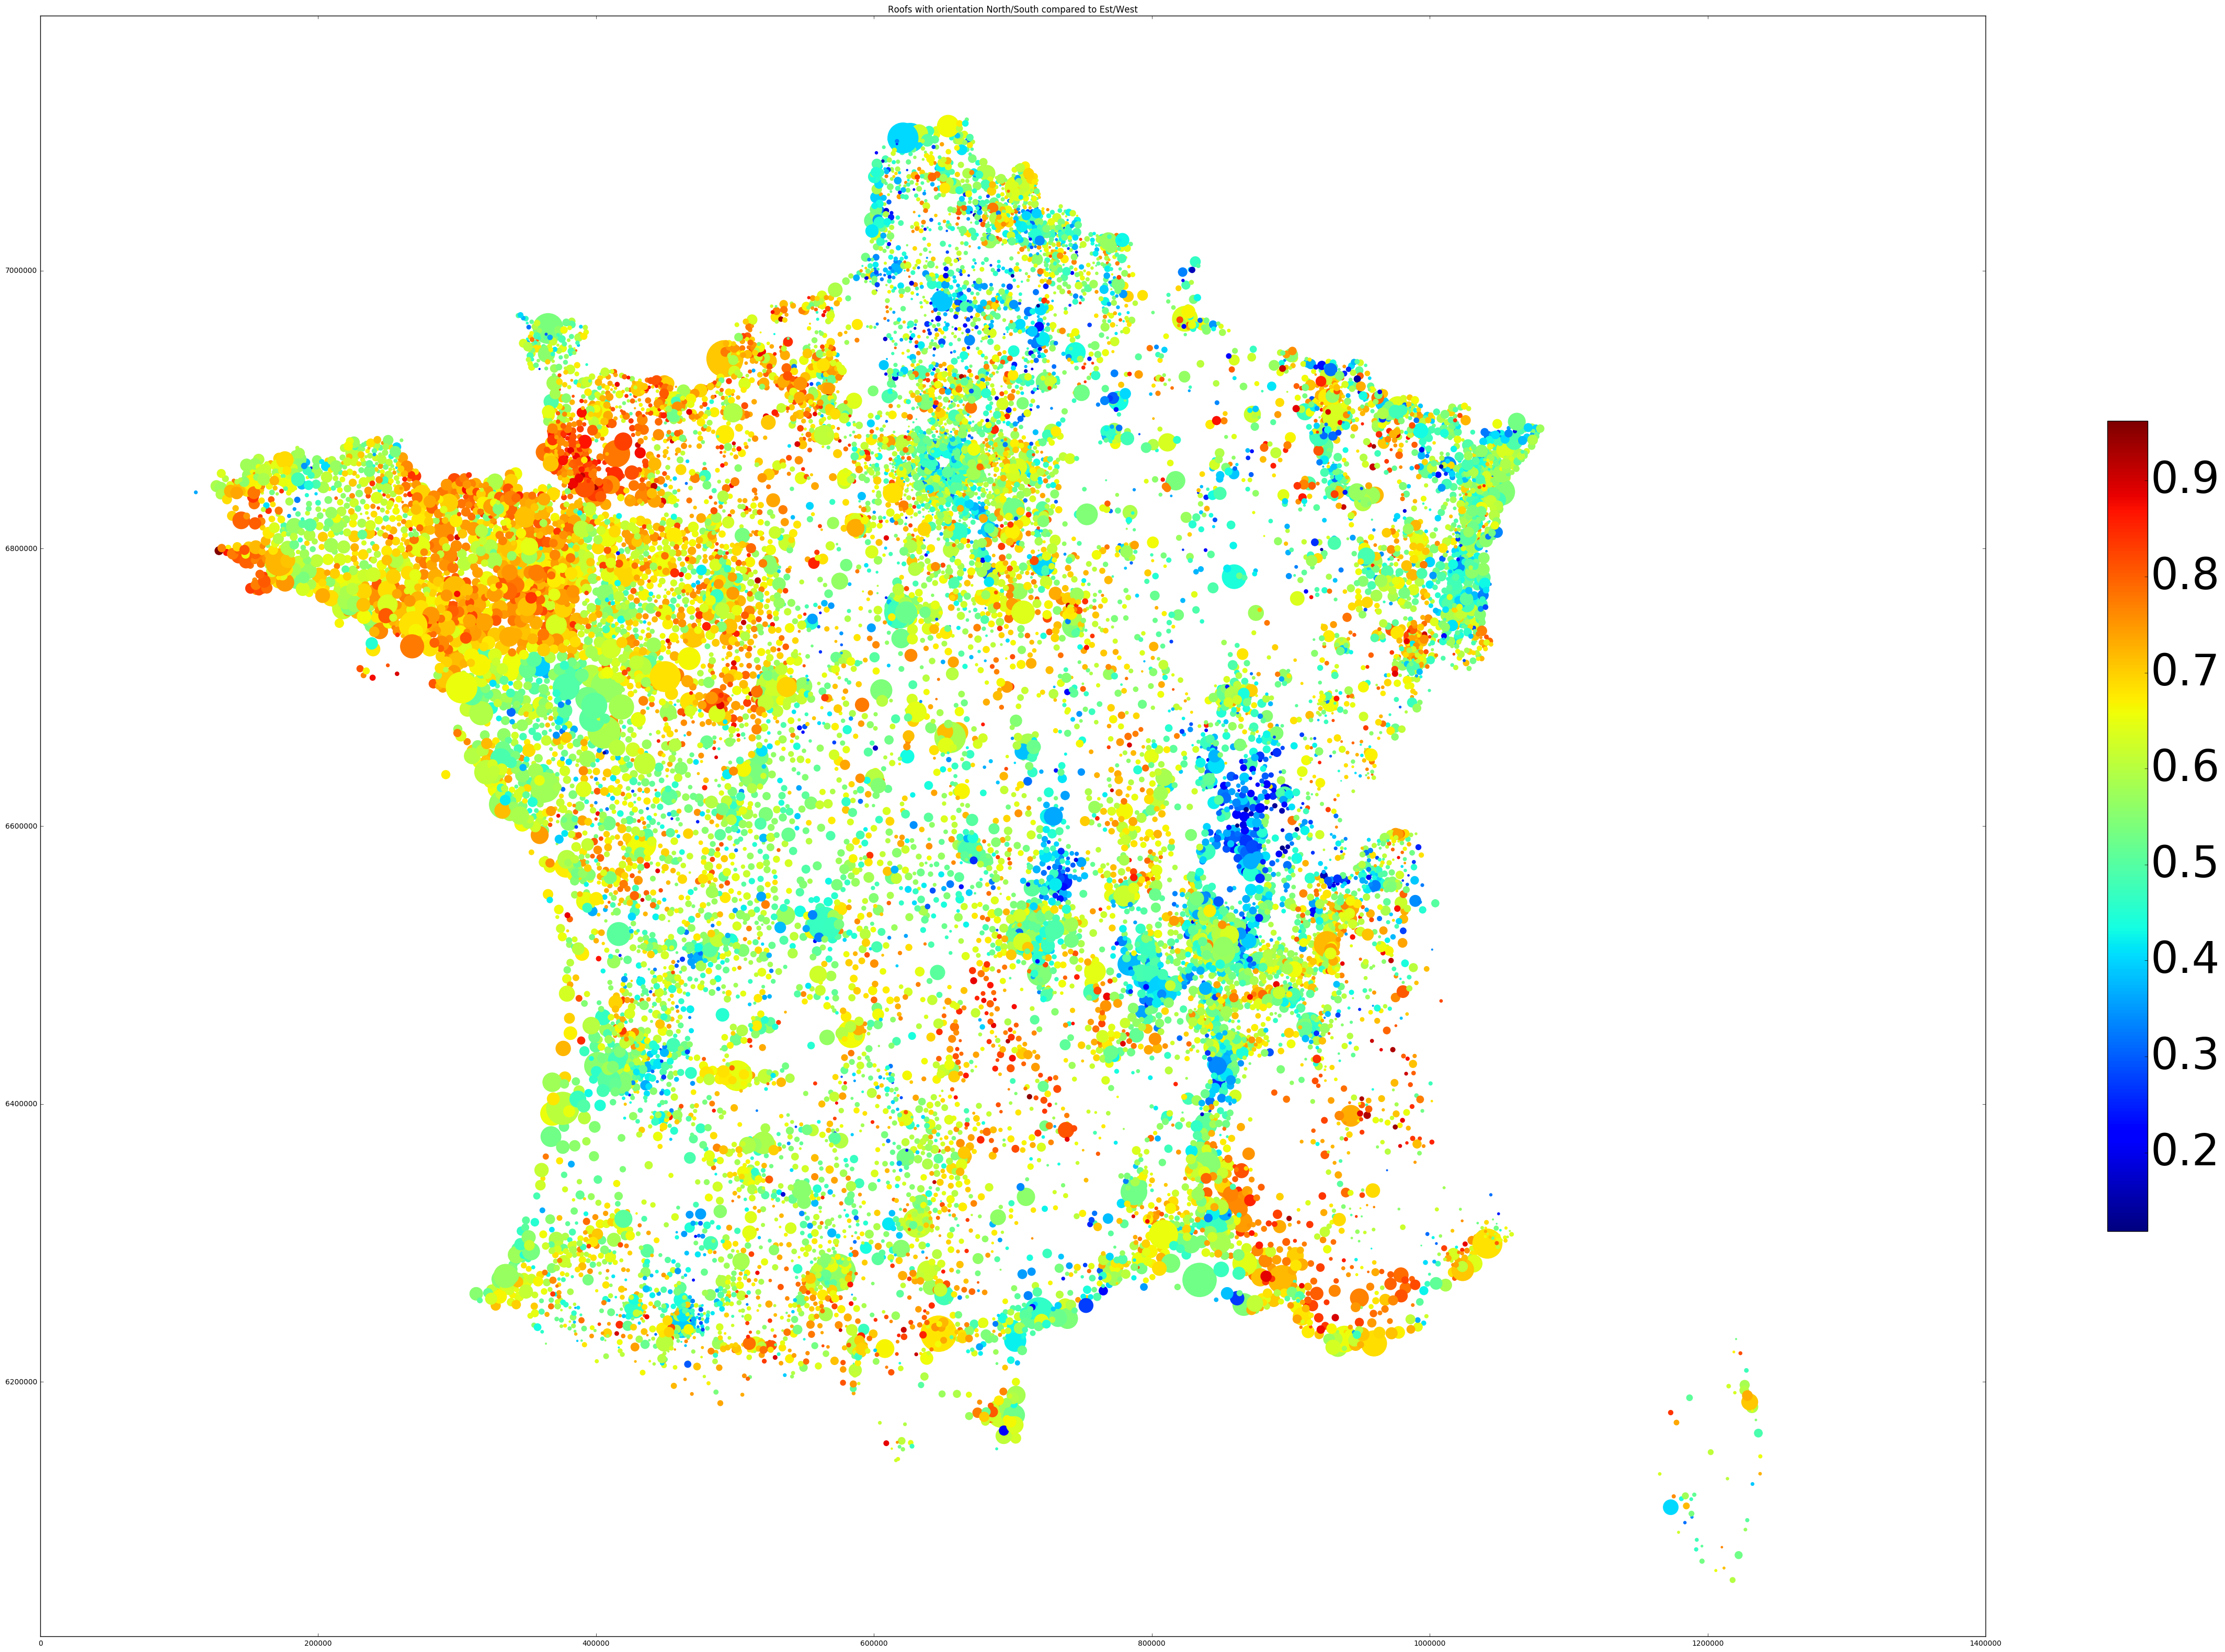

In [20]:
fig = plt.figure(figsize=(60,40))

plt.title('Roofs with orientation North/South compared to Est/West')

plt.axis('equal')
ax = plt.gca()
plt.scatter(
    communes_info_filtered.centroid_x_L93, communes_info_filtered.centroid_y_L93,
    c=communes_info_filtered.orientation_moyenne,
    marker='.',
    s=10*(communes_info_filtered.class_0+communes_info_filtered.class_1),  # /1000000.*2,  # km2
    linewidth=0.
)

cb = plt.colorbar(shrink=0.5)
cb.ax.tick_params(labelsize=60) 

plt.savefig('orientation.png')

## Plot : flat

In [ ]:
communes_info_filtered['flat_proportion'] = (
    communes_info_filtered.class_2 / 
    communes_info_filtered.total
    )

In [ ]:
fig = plt.figure(figsize=(30,20))

plt.title('roportion of flat roofs')

plt.axis('equal')
ax = plt.gca()
plt.scatter(
    communes_info_filtered.centroid_x_L93, communes_info_filtered.centroid_y_L93,
    c=[min(c, 0.35) for c in communes_info_filtered.flat_proportion],
    marker='.',
    s=communes_info_filtered.total,  # /1000000.*2,  # km2
    linewidth=0.
)

plt.colorbar(shrink=0.5)

plt.savefig('flat_roofs.png')